<a href="https://colab.research.google.com/github/souravkumarsahu03/Hand_Written_Digit_Predicton_Project/blob/main/Untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**HAND WRITTEN DIGIT PREDICTION**

**OBJECTIVE:** The main objective of a Handwritten Digit Prediction project is to develop a system that can accurately recognize and classify handwritten digits (from 0 to 9) presented to it. This system should be able to handle variations in handwriting styles and be robust to imperfections in the drawn digits.
The success of the project is measured by the accuracy of the predictions. A well-trained model should be able to achieve high accuracy on unseen handwritten digits.
Some additional aspects :

*   Real-time prediction: Allow users to draw digits on a user interface and get instant predictions.
*   Multiple digit recognition: Extend the model to recognize sequences of handwritten digits.

*   Addressing specific challenges: Focus on recognizing digits from a particular handwriting style (e.g., children's handwriting).





**DATA SOURCE:**


*  YouTube
*  Google
*  Ybi Foundation
*  Kaggle
*  Github








**Import Library**

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

**Import Data**

In [ ]:
from sklearn.datasets import load_digits

In [ ]:
df=load_digits()

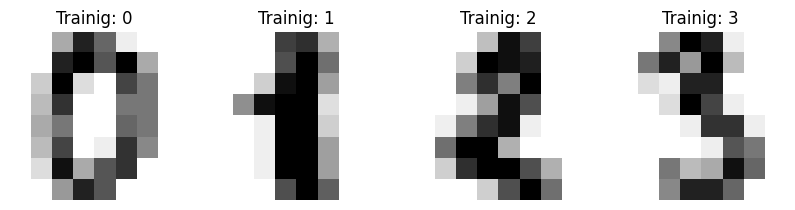

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, df.images, df.target):
  ax.set_axis_off()
  ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
  ax.set_title("Trainig: %i" %label)

**Data Preprocessing**

In [ ]:
df.images.shape

(1797, 8, 8)

In [ ]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [ ]:
df.images[0].shape

(8, 8)

In [ ]:
len(df.images)

1797

In [ ]:
n_samples=len(df.images)
data=df.images.reshape((n_samples, -1))

In [ ]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [ ]:
data[0].shape

(64,)

In [ ]:
data.shape

(1797, 64)

**Scaling Image Data**

In [ ]:
data.min()

0.0

In [ ]:
data.max()

16.0

In [ ]:
data=data/15

In [ ]:
data.min()

0.0

In [ ]:
data.max()

0.06666666666666667

In [ ]:
data[1]

array([0.        , 0.        , 0.        , 0.05      , 0.05416667,
       0.02083333, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.04583333, 0.06666667, 0.0375    , 0.        ,
       0.        , 0.        , 0.        , 0.0125    , 0.0625    ,
       0.06666667, 0.025     , 0.        , 0.        , 0.        ,
       0.02916667, 0.0625    , 0.06666667, 0.06666667, 0.00833333,
       0.        , 0.        , 0.        , 0.        , 0.00416667,
       0.06666667, 0.06666667, 0.0125    , 0.        , 0.        ,
       0.        , 0.        , 0.00416667, 0.06666667, 0.06666667,
       0.025     , 0.        , 0.        , 0.        , 0.        ,
       0.00416667, 0.06666667, 0.06666667, 0.025     , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.04583333,
       0.06666667, 0.04166667, 0.        , 0.        ])

**Train Test Split Data**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, df.target, test_size=0.4)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1078, 64), (719, 64), (1078,), (719,))

**Random Forest Model**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf=RandomForestClassifier()

In [ ]:
rf.fit(X_train, y_train)

RandomForestClassifier()

**Predict Test Data**

In [ ]:
y_pred=rf.predict(X_test)

In [ ]:
y_pred

array([5, 6, 4, 0, 4, 2, 0, 7, 8, 2, 2, 3, 3, 6, 1, 6, 8, 0, 8, 2, 6, 5,
       8, 9, 1, 4, 2, 7, 3, 0, 3, 9, 2, 4, 9, 8, 8, 5, 9, 8, 7, 6, 5, 9,
       3, 2, 7, 4, 8, 9, 7, 8, 2, 9, 4, 1, 3, 4, 9, 7, 8, 6, 3, 7, 9, 6,
       5, 6, 4, 2, 3, 7, 8, 6, 4, 6, 9, 8, 8, 7, 5, 4, 8, 7, 4, 1, 2, 7,
       6, 3, 1, 9, 0, 7, 1, 2, 8, 9, 7, 5, 3, 9, 9, 5, 0, 5, 1, 4, 0, 2,
       5, 7, 0, 9, 0, 2, 3, 6, 7, 4, 8, 9, 0, 8, 6, 8, 2, 2, 4, 2, 8, 2,
       3, 6, 0, 2, 1, 0, 9, 1, 0, 7, 4, 3, 4, 9, 8, 0, 2, 6, 7, 8, 2, 4,
       1, 0, 7, 5, 8, 9, 3, 7, 6, 2, 2, 2, 3, 4, 5, 5, 3, 3, 7, 9, 4, 5,
       6, 4, 5, 3, 3, 7, 9, 5, 6, 5, 6, 7, 4, 2, 1, 4, 8, 9, 5, 6, 0, 6,
       5, 2, 2, 8, 0, 2, 1, 0, 6, 4, 2, 4, 4, 6, 3, 6, 0, 1, 3, 1, 7, 7,
       8, 9, 9, 0, 5, 0, 6, 1, 1, 0, 1, 2, 3, 6, 1, 6, 3, 2, 1, 7, 6, 9,
       5, 8, 3, 6, 0, 9, 8, 3, 5, 4, 7, 3, 0, 1, 7, 9, 6, 1, 9, 3, 3, 7,
       1, 9, 7, 5, 5, 8, 4, 9, 0, 9, 6, 2, 6, 4, 9, 6, 0, 9, 5, 7, 3, 1,
       6, 2, 9, 8, 7, 1, 5, 9, 7, 1, 6, 3, 2, 9, 8,

In [ ]:
x_pred=rf.predict(X_test)

In [ ]:
x_pred

array([5, 6, 4, 0, 4, 2, 0, 7, 8, 2, 2, 3, 3, 6, 1, 6, 8, 0, 8, 2, 6, 5,
       8, 9, 1, 4, 2, 7, 3, 0, 3, 9, 2, 4, 9, 8, 8, 5, 9, 8, 7, 6, 5, 9,
       3, 2, 7, 4, 8, 9, 7, 8, 2, 9, 4, 1, 3, 4, 9, 7, 8, 6, 3, 7, 9, 6,
       5, 6, 4, 2, 3, 7, 8, 6, 4, 6, 9, 8, 8, 7, 5, 4, 8, 7, 4, 1, 2, 7,
       6, 3, 1, 9, 0, 7, 1, 2, 8, 9, 7, 5, 3, 9, 9, 5, 0, 5, 1, 4, 0, 2,
       5, 7, 0, 9, 0, 2, 3, 6, 7, 4, 8, 9, 0, 8, 6, 8, 2, 2, 4, 2, 8, 2,
       3, 6, 0, 2, 1, 0, 9, 1, 0, 7, 4, 3, 4, 9, 8, 0, 2, 6, 7, 8, 2, 4,
       1, 0, 7, 5, 8, 9, 3, 7, 6, 2, 2, 2, 3, 4, 5, 5, 3, 3, 7, 9, 4, 5,
       6, 4, 5, 3, 3, 7, 9, 5, 6, 5, 6, 7, 4, 2, 1, 4, 8, 9, 5, 6, 0, 6,
       5, 2, 2, 8, 0, 2, 1, 0, 6, 4, 2, 4, 4, 6, 3, 6, 0, 1, 3, 1, 7, 7,
       8, 9, 9, 0, 5, 0, 6, 1, 1, 0, 1, 2, 3, 6, 1, 6, 3, 2, 1, 7, 6, 9,
       5, 8, 3, 6, 0, 9, 8, 3, 5, 4, 7, 3, 0, 1, 7, 9, 6, 1, 9, 3, 3, 7,
       1, 9, 7, 5, 5, 8, 4, 9, 0, 9, 6, 2, 6, 4, 9, 6, 0, 9, 5, 7, 3, 1,
       6, 2, 9, 8, 7, 1, 5, 9, 7, 1, 6, 3, 2, 9, 8,

**Model Accuracy**

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
confusion_matrix(y_test, y_pred)

array([[64,  0,  0,  0,  2,  0,  0,  0,  0,  0],
       [ 0, 68,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 74,  0,  0,  0,  0,  0,  0,  1],
       [ 0,  1,  0, 66,  0,  1,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 64,  0,  0,  2,  0,  1],
       [ 0,  0,  0,  0,  0, 71,  0,  0,  0,  1],
       [ 0,  1,  0,  0,  0,  0, 79,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 71,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 67,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  1,  2, 78]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        66
           1       0.96      1.00      0.98        68
           2       1.00      0.99      0.99        75
           3       0.99      0.96      0.97        69
           4       0.97      0.96      0.96        67
           5       0.99      0.99      0.99        72
           6       1.00      0.98      0.99        81
           7       0.95      1.00      0.97        71
           8       0.96      0.99      0.97        68
           9       0.96      0.95      0.96        82

    accuracy                           0.98       719
   macro avg       0.98      0.98      0.98       719
weighted avg       0.98      0.98      0.98       719



In [ ]:
print(classification_report(y_test, x_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        66
           1       0.96      1.00      0.98        68
           2       1.00      0.99      0.99        75
           3       0.99      0.96      0.97        69
           4       0.97      0.96      0.96        67
           5       0.99      0.99      0.99        72
           6       1.00      0.98      0.99        81
           7       0.95      1.00      0.97        71
           8       0.96      0.99      0.97        68
           9       0.96      0.95      0.96        82

    accuracy                           0.98       719
   macro avg       0.98      0.98      0.98       719
weighted avg       0.98      0.98      0.98       719



**EXPLANATION :**
This project tackles a classic problem in machine learning: handwritten digit recognition. The goal is to build a model that can accurately predict the digit (0-9) represented by a handwritten image. Here's a breakdown of the key steps:


* Data Acquisition
* Data Preprocessing
* Model Selection and Training:
* Model Evaluation
* Visualization and Deployment

Benefits of this project:

*  Lays the foundation for exploring more complex deep learning models for computer vision tasks.
*  Provides a hands-on introduction to machine learning concepts like classification, training, and evaluation.
*  Offers a practical application of image recognition techniques.



